In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import json
import matplotlib.pyplot as plt
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA available: True
GPU name: Tesla T4


In [ ]:
!pip install tqdm matplotlib

!git clone https://github.com/spro/char-rnn.pytorch.git
%cd char-rnn.pytorch

Cloning into 'char-rnn.pytorch'...
remote: Enumerating objects: 54, done.
remote: Total 54 (delta 0), reused 0 (delta 0), pack-reused 54 (from 1)
Receiving objects: 100% (54/54), 11.79 KiB | 11.79 MiB/s, done.
Resolving deltas: 100% (30/30), done.
/content/char-rnn.pytorch


In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 8.3 MB/s eta 0:00:00


In [ ]:
!mkdir data
!curl https://www.gutenberg.org/cache/epub/1661/pg1661.txt -o data/sherlockholmes.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  593k  100  593k    0     0   660k      0 --:--:-- --:--:-- --:--:--  661k


In [ ]:
!python train.py data/sherlockholmes.txt --n_epochs 300 --n_layers 2 --hidden_size 768 --chunk_len 200 --batch_size 128 --cuda

Using CUDA
Training for 300 epochs...
 33% 99/300 [01:10<02:37,  1.28it/s] 11s (100 33%) 1.9799]
When hape where to in, thot at I onmens and the hat me a
the hand, Went to in sorn cut of thing gat. I 

 66% 199/300 [02:21<01:10,  1.43it/s] 22s (200 66%) 1.7049]
When, it corsty, who would would
cown of his words wollow worman at in you compration. The were busise 

100% 299/300 [03:33<00:00,  1.34it/s] 34s (300 100%) 1.5750]
Which I was this very pocked to minch some to acted to extrove eveat to the come. "I the seet to for t 

100% 300/300 [03:34<00:00,  1.40it/s]
Saving...
Saved as sherlockholmes.pt


In [ ]:
!python generate.py sherlockholmes.pt -p "Holmes:" -l 750 -t 0.4

Holmes:

"'And why I am so you have a small brown and have a small your hands of the house of the matter of the floor of the stairs, and the looking conting his hand and from the goose of the stood to see that an indicted of the attending of the morning the first of the colonel and lifelled and the corridor of the streets, and there was a passing the story of the corrided and morning that I have been heard and the door in the possible singular and should be some considerable should some to me that the matter, and I have been remained to the streets of the long from the seemed to the streets to me the matter, and I was something out of a very closely and complete bridge which I have a man and considerable and having and stepped to my for the compli


In [ ]:
!python generate.py sherlockholmes.pt -p "Holmes:" -l 750 -t 0.6

Holmes: All that
Boness that  you as shown as the dear the home should some possibly disguesty door was the commoonel in a spinced to his geen him and in a small of a steps had some advice by this the door and day and man on the
grown to the arts and dress to me that it is in the window what on the jeweller some from the threather was a complice to discration of the true sithing of a particulation which I could not just be to the most a
little things of a books of the corones round his some for me, the strong little best and made a villows of my reather some
home. But I letters, and I come and most of at my should not that I could be every much of the exadudred the clanched and
thing to me the horrow more to him and little door. On the all the bac


In [ ]:
!python generate.py sherlockholmes.pt -p "Holmes:" -l 750 -t 0.8

Holmes: All some in the anto a very from the maided of the clergarthy ancent in able countral probsoner."

"Precting gems in my right cooseen and at
from the side of reason end your slipse. He was arry, and a suright sust leave, the soment the dember mestraing this bortunation. There was my business, and
its want them?"

"No once is some aother life."

"But have seems the difbilian?"

"It opient a passessed agent of in London her sometillicing in my sprise to unto the
glanced."

"Well, and from the ground have brown of the
methout in old the other, said Holmes, "and his evention of the old
like himself pressionally that I mighting it may camidaining anter not complied their honal
front of a months and should have door just one thirty. There wish t


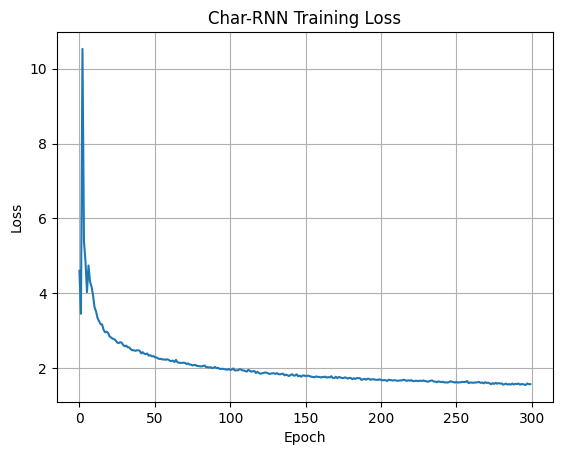

In [ ]:
with open('losses.json', 'r') as f:
    losses = json.load(f)

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Char-RNN Training Loss")
plt.grid(True)
plt.show()

In [ ]:
generated_text = !python sample.py --checkpoint checkpoints/char-rnn_epoch1.pt
with open("sample_output.txt", "w") as f:
    f.write("\n".join(generated_text))